Calulating with statistic Mean...
Plotting shower_energy...
Calulating with statistic STD...
Plotting shower_energy...


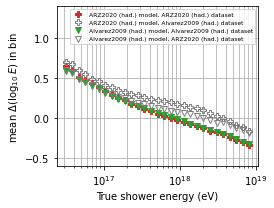

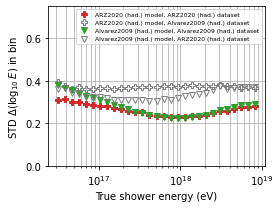

In [1]:

# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import argparse
import os
import time
import pickle
from NuRadioReco.utilities import units
from scipy import stats
from itertools import product, combinations
from radiotools import plthelpers as php
from tensorflow import keras
from radiotools import helper as hp
# -------

# Set the figsize in order to get larger text in image
plt.rcParams["figure.figsize"] = (4.0,3.0)

def plot_same(x_data_1, x_data_2, x_data_3, x_data_4, ax1_data_y_1, ax1_data_y_2, ax1_data_y_3, ax1_data_y_4):
    print(f"Plotting {file_name}...")

    fig_same, ax1 = plt.subplots()

    ax1.set_xlabel(x_label)
    ax1.set_ylabel(ax1_y_label)

    # Set ax1 to high order to make it be in front so label is in front, and datapoints
    #ax1.set_zorder(1)

    if file_name == "shower_energy":
        ax1.set_xscale('log')

    # Remove all valeys that have STD = 0 in graph from ARZ (had. + EM) data and the others
    if statistic_string == "STD":
        zero_mask = ax1_data_y_4 == 0
        x_data_4 = x_data_4[~zero_mask]
        ax1_data_y_4 = ax1_data_y_4[~zero_mask]

        zero_mask = ax1_data_y_3 == 0
        x_data_3 = x_data_3[~zero_mask]
        ax1_data_y_3 = ax1_data_y_3[~zero_mask]

        zero_mask = ax1_data_y_2 == 0
        x_data_2 = x_data_2[~zero_mask]
        ax1_data_y_2 = ax1_data_y_2[~zero_mask]

        zero_mask = ax1_data_y_1 == 0
        x_data_1 = x_data_1[~zero_mask]
        ax1_data_y_1 = ax1_data_y_1[~zero_mask]

    # # Remove last peices of data as their bins are weird for some azimuth
    # if file_name == "shower_energy" or file_name == "nu_azimuth" or file_name == "nu_SNR":
    #     x_data_1 = x_data_1[0:-1]
    #     x_data_2 = x_data_2[0:-1]
    #     x_data_3 = x_data_3[0:-1]
    #     ax1_data_y_1 = ax1_data_y_1[0:-1]
    #     ax1_data_y_2 = ax1_data_y_2[0:-1]
    #     ax1_data_y_3 = ax1_data_y_3[0:-1]

    # Remove any bins with zero events for nu_zenith
    # if file_name == "nu_zenith":
    #     ind_count_not_0 = ax2_data_y_1 != 0
    #     x_data_1 = x_data_1[ind_count_not_0]
    #     ax1_data_y_1 = ax1_data_y_1[ind_count_not_0]

    #     ind_count_not_0 = ax2_data_y_2 != 0
    #     x_data_2 = x_data_2[ind_count_not_0]
    #     ax1_data_y_2 = ax1_data_y_2[ind_count_not_0]

    #     ind_count_not_0 = ax2_data_y_3 != 0
    #     x_data_3 = x_data_3[ind_count_not_0]
    #     ax1_data_y_3 = ax1_data_y_3[ind_count_not_0]

    # lns1 = ax1.plot(x_data_1, ax1_data_y_1, "*", color=ax1_color, label = emission_models[0])
    # lns2 = ax1.plot(x_data_2, ax1_data_y_2, "*", color=ax1_color, label = emission_models[1])
    # lns3 = ax1.plot(x_data_3, "*", color=ax1_color, label = emission_models[2])

    lns1 = ax1.plot(x_data_1, ax1_data_y_1, point_format[0], label = emission_models[0], color=colours[0], fillstyle=fillstyle[0])
    lns2 = ax1.plot(x_data_2, ax1_data_y_2, point_format[1], label = emission_models[1], color=colours[1], fillstyle=fillstyle[1])
    lns3 = ax1.plot(x_data_3, ax1_data_y_3, point_format[2], label = emission_models[2], color=colours[2], fillstyle=fillstyle[2])
    lns4 = ax1.plot(x_data_4, ax1_data_y_4, point_format[3], label = emission_models[3], color=colours[3], fillstyle=fillstyle[3])

    # Set axis limits so they are same on all plots
    if statistic_string == "SIXTYEIGHT":
        if file_name == "shower_energy":
            ax1.set_ylim(0, 0.9)
        elif file_name == "nu_SNR":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_zenith":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_azimuth":
            ax1.set_ylim(0, 0.75)
    elif statistic_string == "Mean":
        if file_name == "shower_energy":
            ax1.set_ylim(-0.6, 1.4)
        elif file_name == "nu_SNR":
            ax1.set_ylim(-0.2, 0.2)
        elif file_name == "nu_zenith":
            ax1.set_ylim(-0.2, 0.75)
        elif file_name == "nu_azimuth":
            ax1.set_ylim(-0.2, 0.2)
    elif statistic_string == "Median":
        if file_name == "shower_energy":
            ax1.set_ylim(-0.4, 0.9)
        elif file_name == "nu_SNR":
            ax1.set_ylim(-0.2, 0.2)
        elif file_name == "nu_zenith":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_azimuth":
            ax1.set_ylim(-0.2, 0.2)
    elif statistic_string == "RMS":
        if file_name == "shower_energy":
            ax1.set_ylim(0, 0.9)
        elif file_name == "nu_SNR":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_zenith":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_azimuth":
            ax1.set_ylim(0, 0.75)
    elif statistic_string == "STD":
        if file_name == "shower_energy":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_SNR":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_zenith":
            ax1.set_ylim(0, 0.75)
        elif file_name == "nu_azimuth":
            ax1.set_ylim(0, 0.75)

    # plt.title(plot_title)
    plt.grid(True, which="both")

    ax1.legend(prop={'size': 6})

    fig_same.tight_layout()  # otherwise the right y-label is slightly clipped

    #plt.subplots_adjust(top=0.88)
    fig_same.savefig(f"{plot_dir}/all_on_same/{plot_name_prepend}_{file_name}_same_statistic_{statistic_string}.pdf", bbox_inches='tight')



# Save the run name
# run_names = ["run_HAD_vs_EMHAD", "run_EMHAD_vs_HAD"]
# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset", "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset"]
# colours = ["tab:green", "tab:red"]
# point_format = ["v", "P"]

### THIS IS USED, OR THE OTHER ONE WITH "THIS IS USED" TAG
# plot_name_prepend = "ARZHAD_vs_ARZHADEM"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ARZHADEM", 
#             "run_ARZHADEM_vs_ARZHADEM", 
#             "run_ARZHADEM_vs_ARZHAD"]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset",
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had. + EM) dataset", 
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:red", "tab:gray", "tab:purple", "tab:gray"]
# point_format = ["P", "P", "p", "p"]
# fillstyle = ["full", "none", "full", "none"]

# plot_name_prepend = "ARZHAD_vs_ARZHADEM_model:ARZHAD"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ARZHADEM", ]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset",
#                     ]
# colours = ["tab:red", "tab:gray"]
# point_format = ["P", "P"]
# fillstyle = ["full", "none"]

# plot_name_prepend = "ARZHAD_vs_ARZHADEM_model:ARZHADEM"
# run_names = ["run_ARZHADEM_vs_ARZHADEM", 
#              "run_ARZHADEM_vs_ARZHAD" ]

# emission_models = ["ARZ2020 (had. + EM) model, ARZ2020 (had. + EM) dataset", 
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:purple", "tab:gray"]
# point_format = ["p", "p"]
# fillstyle = ["full", "none"]

### THIS IS USED, OR THE OTHER ONE WITH "THIS IS USED" TAG
plot_name_prepend = "ARZHAD_vs_ALVAREZHAD"
run_names = ["run_ARZHAD_vs_ARZHAD",
            "run_ARZHAD_vs_ALVAREZHAD",
            "run_ALVAREZHAD_vs_ALVAREZHAD",
            "run_ALVAREZHAD_vs_ARZHAD" ]

emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
                    "ARZ2020 (had.) model, Alvarez2009 (had.) dataset",
                    "Alvarez2009 (had.) model, Alvarez2009 (had.) dataset", 
                    "Alvarez2009 (had.) model, ARZ2020 (had.) dataset",
                    ]
colours = ["tab:red", "tab:gray", "tab:green", "tab:gray"]
point_format = ["P", "P", "v", "v"]
fillstyle = ["full", "none", "full", "none"]

# plot_name_prepend = "ARZHAD_vs_ALVAREZHAD_model:ARZHAD"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ALVAREZHAD", ]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, Alvarez2009 (had.) dataset",
#                     ]
# colours = ["tab:red", "tab:gray"]
# point_format = ["P", "P"]
# fillstyle = ["full", "none"]

# plot_name_prepend = "ARZHAD_vs_ALVAREZHAD_model:ALVAREZHAD"
# run_names = ["run_ALVAREZHAD_vs_ALVAREZHAD",
#             "run_ALVAREZHAD_vs_ARZHAD", ]

# emission_models = ["Alvarez2009 (had.) model, Alvarez2009 (had.) dataset", 
#                     "Alvarez2009 (had.) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:green", "tab:gray"]
# point_format = ["v", "v"]
# fillstyle = ["full", "none"]



# See which statistic to calculate...
# statistic_string = "SIXTYEIGHT"
# statistic_string = "Mean"
# statistic_string = "Median"
# statistic_string = "RMS"
# statistic_string = "STD"
# for statistic_string in ["SIXTYEIGHT", "Mean", "Median", "RMS", "STD"]:
for statistic_string in ["Mean", "STD"]:

    print(f"Calulating with statistic {statistic_string}...")


    plots_dir = f"plots"
    plot_dir = f"plots"

    # Make sure same_data file exists
    same_data_file = f'{plots_dir}/plotdata_{statistic_string}_{run_names[0]}.npy'
    if not os.path.isfile(same_data_file):
        print(f"Same datafile does not exist for {run_names[0]}!")
        raise Exception

    # Load same data file
    with open(same_data_file, 'rb') as f:
        nu_energy_bins_1 = np.load(f)
        binned_resolution_nu_energy_1 = np.load(f)
        binned_resolution_nu_energy_count_1 = np.load(f)

        nu_azimuth_bins_1 = np.load(f)
        binned_resolution_nu_azimuth_1 = np.load(f)
        binned_resolution_nu_azimuth_count_1 = np.load(f)

        nu_zenith_bins_1 = np.load(f)
        binned_resolution_nu_zenith_1 = np.load(f)
        binned_resolution_nu_zenith_count_1 = np.load(f)

        SNR_means_1 = np.load(f)
        binned_resolution_SNR_mean_1 = np.load(f)
        binned_resolution_SNR_mean_count_1 = np.load(f)

    # Make sure same_data file exists,
    same_data_file = f'{plots_dir}/plotdata_{statistic_string}_{run_names[1]}.npy'
    if not os.path.isfile(same_data_file):
        print(f"Same datafile does not exist for {run_names[1]}!")
        raise Exception

    # Load same data file
    with open(same_data_file, 'rb') as f:
        nu_energy_bins_2 = np.load(f)
        binned_resolution_nu_energy_2 = np.load(f)
        binned_resolution_nu_energy_count_2 = np.load(f)

        nu_azimuth_bins_2 = np.load(f)
        binned_resolution_nu_azimuth_2 = np.load(f)
        binned_resolution_nu_azimuth_count_2 = np.load(f)

        nu_zenith_bins_2 = np.load(f)
        binned_resolution_nu_zenith_2 = np.load(f)
        binned_resolution_nu_zenith_count_2 = np.load(f)

        SNR_means_2 = np.load(f)
        binned_resolution_SNR_mean_2 = np.load(f)
        binned_resolution_SNR_mean_count_2 = np.load(f)


    # Make sure same_data file exists,
    same_data_file = f'{plots_dir}/plotdata_{statistic_string}_{run_names[2]}.npy'
    if not os.path.isfile(same_data_file):
        print(f"Same datafile does not exist for {run_names[2]}!")
        raise Exception

    # Load same data file
    with open(same_data_file, 'rb') as f:
        nu_energy_bins_3 = np.load(f)
        binned_resolution_nu_energy_3 = np.load(f)
        binned_resolution_nu_energy_count_3 = np.load(f)

        nu_azimuth_bins_3 = np.load(f)
        binned_resolution_nu_azimuth_3 = np.load(f)
        binned_resolution_nu_azimuth_count_3 = np.load(f)

        nu_zenith_bins_3 = np.load(f)
        binned_resolution_nu_zenith_3 = np.load(f)
        binned_resolution_nu_zenith_count_3 = np.load(f)

        SNR_means_3 = np.load(f)
        binned_resolution_SNR_mean_3 = np.load(f)
        binned_resolution_SNR_mean_count_3 = np.load(f)

    # Make sure same_data file exists,
    same_data_file = f'{plots_dir}/plotdata_{statistic_string}_{run_names[3]}.npy'
    if not os.path.isfile(same_data_file):
        print(f"Same datafile does not exist for {run_names[3]}!")
        raise Exception

    # Load same data file
    with open(same_data_file, 'rb') as f:
        nu_energy_bins_4 = np.load(f)
        binned_resolution_nu_energy_4 = np.load(f)
        binned_resolution_nu_energy_count_4 = np.load(f)

        nu_azimuth_bins_4 = np.load(f)
        binned_resolution_nu_azimuth_4 = np.load(f)
        binned_resolution_nu_azimuth_count_4 = np.load(f)

        nu_zenith_bins_4 = np.load(f)
        binned_resolution_nu_zenith_4 = np.load(f)
        binned_resolution_nu_zenith_count_4 = np.load(f)

        SNR_means_4 = np.load(f)
        binned_resolution_SNR_mean_4 = np.load(f)
        binned_resolution_SNR_mean_count_4 = np.load(f)

    sigma_68_string = "_{68}"
    delta_log_E_string = r"$\Delta(\log_{10}\:E)$"

    ax2_data_y_1 = binned_resolution_nu_zenith_count_1
    ax2_data_y_2 = binned_resolution_nu_zenith_count_2
    ax2_data_y_3 = binned_resolution_nu_zenith_count_3
    ax2_data_y_4 = binned_resolution_nu_zenith_count_4

    # Energy resolution & count on same axis
    # Constants:
    ax1_color = 'tab:blue'
    ax2_color = 'tab:orange'
    x_label = r"True shower energy (eV)"

    if statistic_string == "SIXTYEIGHT":
        ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin"
    elif statistic_string == "Mean":
        ax1_y_label = fr"mean {delta_log_E_string} in bin"
    elif statistic_string == "Median":
        ax1_y_label = fr"median {delta_log_E_string} in bin"
    elif statistic_string == "RMS":
        ax1_y_label = fr"RMS {delta_log_E_string} in bin"
    elif statistic_string == "STD":
        ax1_y_label = fr"STD {delta_log_E_string} in bin"
    ax2_y_label = "Events"

    x_data_1 = nu_energy_bins_1
    x_data_2 = nu_energy_bins_2
    x_data_3 = nu_energy_bins_3
    x_data_4 = nu_energy_bins_4
    ax1_data_y_1 = binned_resolution_nu_energy_1
    ax1_data_y_2 = binned_resolution_nu_energy_2
    ax1_data_y_3 = binned_resolution_nu_energy_3
    ax1_data_y_4 = binned_resolution_nu_energy_4


    file_name = "shower_energy"
    if statistic_string == "SIXTYEIGHT":
        plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of shower energy"
    elif statistic_string == "Mean":
        plot_title = fr"Mean value of {delta_log_E_string} as a function of shower energy"
    elif statistic_string == "Median":
        plot_title = fr"Median value of {delta_log_E_string} as a function of shower energy"
    elif statistic_string == "RMS":
        plot_title = fr"RMS value of {delta_log_E_string} as a function of shower energy"
    elif statistic_string == "STD":
        plot_title = fr"STD value of {delta_log_E_string} as a function of shower energy"
    legend_loc = "upper center"
    # Constants END

    plot_same(x_data_1, x_data_2, x_data_3, x_data_4, ax1_data_y_1, ax1_data_y_2, ax1_data_y_3, ax1_data_y_4)
    # ______________________________________


    # # Azimuth resolution & count on same axis
    # # Constants:
    # x_label = r"True $\nu$ azimuth angle (°)"
    # if statistic_string == "SIXTYEIGHT":
    #     ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin"
    # elif statistic_string == "Mean":
    #     ax1_y_label = fr"mean {delta_log_E_string} in bin"
    # elif statistic_string == "Median":
    #     ax1_y_label = fr"median {delta_log_E_string} in bin"
    # elif statistic_string == "RMS":
    #     ax1_y_label = fr"RMS {delta_log_E_string} in bin"
    # elif statistic_string == "STD":
    #     ax1_y_label = fr"STD {delta_log_E_string} in bin"
    # ax2_y_label = "Events"

    # x_data_1 = nu_azimuth_bins_1
    # x_data_2 = nu_azimuth_bins_2
    # ax1_data_y_1 = binned_resolution_nu_azimuth_1
    # ax1_data_y_2 = binned_resolution_nu_azimuth_2


    # file_name = "nu_azimuth"
    # if statistic_string == "SIXTYEIGHT":
    #     plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of $\nu$ azimuth angle"
    # elif statistic_string == "Mean":
    #     plot_title = fr"Mean value of {delta_log_E_string} as a function of $\nu$ azimuth angle"
    # elif statistic_string == "Median":
    #     plot_title = fr"Median value of {delta_log_E_string} as a function of $\nu$ azimuth angle"
    # elif statistic_string == "RMS":
    #     plot_title = fr"RMS value of {delta_log_E_string} as a function of $\nu$ azimuth angle"
    # elif statistic_string == "STD":
    #     plot_title = fr"STD value of {delta_log_E_string} as a function of $\nu$ azimuth angle"
    # legend_loc = "upper right"
    # # Constants END

    # # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
    # # ______________________________________



    # # Zenith resolution & count on same axis
    # # Constants:
    # x_label = r"True $\nu$ zenith angle (°)"
    # if statistic_string == "SIXTYEIGHT":
    #     ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin"
    # elif statistic_string == "Mean":
    #     ax1_y_label = fr"mean {delta_log_E_string} in bin"
    # elif statistic_string == "Median":
    #     ax1_y_label = fr"median {delta_log_E_string} in bin"
    # elif statistic_string == "RMS":
    #     ax1_y_label = fr"RMS {delta_log_E_string} in bin"
    # elif statistic_string == "STD":
    #     ax1_y_label = fr"STD {delta_log_E_string} in bin"
    # ax2_y_label = "Events"

    # x_data_1 = nu_zenith_bins_1
    # x_data_2 = nu_zenith_bins_2
    # ax1_data_y_1 = binned_resolution_nu_zenith_1
    # ax1_data_y_2 = binned_resolution_nu_zenith_2


    # file_name = "nu_zenith"
    # if statistic_string == "SIXTYEIGHT":
    #     plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of $\nu$ zenith angle"
    # elif statistic_string == "Mean":
    #     plot_title = fr"Mean value of {delta_log_E_string} as a function of $\nu$ zenith angle"
    # elif statistic_string == "Median":
    #     plot_title = fr"Median value of {delta_log_E_string} as a function of $\nu$ zenith angle"
    # elif statistic_string == "RMS":
    #     plot_title = fr"RMS value of {delta_log_E_string} as a function of $\nu$ zenith angle"
    # elif statistic_string == "STD":
    #     plot_title = fr"STD value of {delta_log_E_string} as a function of $\nu$ zenith angle"
    # legend_loc = "upper left"
    # # Constants END

    # # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
    # # ______________________________________


    # # SNR resolution & count on same axis
    # # Constants:
    # x_label = r"Event SNR"
    # if statistic_string == "SIXTYEIGHT":
    #     ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin"
    # elif statistic_string == "Mean":
    #     ax1_y_label = fr"mean {delta_log_E_string} in bin"
    # elif statistic_string == "Median":
    #     ax1_y_label = fr"median {delta_log_E_string} in bin"
    # elif statistic_string == "RMS":
    #     ax1_y_label = fr"RMS {delta_log_E_string} in bin"
    # elif statistic_string == "STD":
    #     ax1_y_label = fr"STD {delta_log_E_string} in bin"
    # ax2_y_label = "Events"

    # x_data_1 = SNR_means_1
    # x_data_2 = SNR_means_2
    # x_data_3 = SNR_means_3
    # x_data_4 = SNR_means_4
    # ax1_data_y_1 = binned_resolution_SNR_mean_1
    # ax1_data_y_2 = binned_resolution_SNR_mean_2
    # ax1_data_y_3 = binned_resolution_SNR_mean_3
    # ax1_data_y_4 = binned_resolution_SNR_mean_4


    # file_name = "nu_SNR"
    # if statistic_string == "SIXTYEIGHT":
    #     plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of event SNR"
    # elif statistic_string == "Mean":
    #     plot_title = fr"Mean value of {delta_log_E_string} as a function of event SNR"
    # elif statistic_string == "Median":
    #     plot_title = fr"Median value of {delta_log_E_string} as a function of event SNR"
    # elif statistic_string == "RMS":
    #     plot_title = fr"RMS value of {delta_log_E_string} as a function of event SNR"
    # elif statistic_string == "STD":
    #     plot_title = fr"STD value of {delta_log_E_string} as a function of event SNR"

    # legend_loc = "upper right"
    # # Constants END

    # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
    # ______________________________________

